In [211]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

def generate_twiddle_factor_matrix(M, N):
    W_row = np.exp(1j * 2 * np.pi / M * np.outer(np.arange(M), np.arange(M)))
    W_col = np.exp(1j * 2 * np.pi / N * np.outer(np.arange(N), np.arange(N)))
    return W_row, W_col

def idft_2d(X):
    W_row, W_col = generate_twiddle_factor_matrix(X.shape[0], X.shape[1])
    X_rows = np.dot(W_row, X)
    X_idft = np.dot(X_rows, W_col) / (X.shape[0] * X.shape[1])
    return X_idft

def reverse_fft_shift(fshift):
    rows, cols = fshift.shape
    center_row, center_col = rows // 2, cols // 2
    row_mask = np.hstack((np.arange(center_row, rows), np.arange(center_row)))
    col_mask = np.hstack((np.arange(center_col, cols), np.arange(center_col)))
    fshift_reverse = fshift[row_mask, :][:, col_mask]
    return fshift_reverse

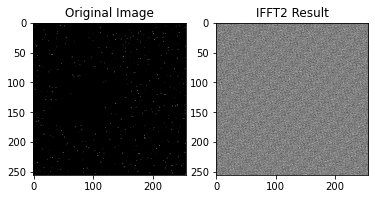

In [205]:
file = open("mrimage2d.txt", "r")

data=[]

for line in file:
    
    row=[]

    for entry in line.strip().split("\t"):
        
        row.append(entry)
        
    data.append(row)

data_=data[:256]

data_np=np.array(data_)

Final_data=[]

for rows in data_np:
    
    SD =[]
    
    for samp in rows:
        
        SD.append(comp_number(samp))
        
    Final_data.append(SD)

X = np.array(Final_data, dtype=np.complex128)

# X= np.fft.fftshift(Final_data_np)

# X = Final_data_np

rows, cols = X.shape

crow, ccol = rows//2, cols//2

X[crow-20:crow+20, ccol-40:ccol-10] = 0

W_row, W_col = generate_twiddle_factor_matrix(X.shape[0], X.shape[1])

X_idft = idft_2d(X, W_row, W_col)

np_ifft = np.fft.ifft2(np.fft.ifftshift(X))

Mag_spectrum = np.log(np.abs(np_ifft))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(np.abs(X), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('IFFT2 Result')
plt.imshow(np.real(np_ifft), cmap='gray')

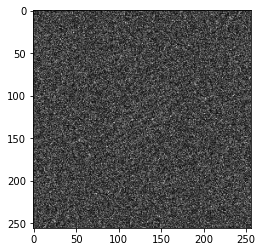

In [215]:
np_ifft_abs = np.abs(np_ifft)

np_ifft_abs_norm=(np_ifft_abs - np.min(np_ifft_abs[1:,1:]))/(np.max(np_ifft_abs[1:,1:])-np.min(np_ifft_abs[1:,1:]))

np_ifft_abs_norm=(np_ifft_abs_norm*255).astype("uint8")

plt.imshow(np_ifft_abs_norm, cmap="gray")

In [216]:
def comp_number(data):
    
    matches = re.match(r'([-+]?\d*\.\d+|\d+)([-+]?\d*\.\d+|\d+)i', data)
    
    if matches:
        
        real_part = float(matches.group(1))
        
        imag_part = float(matches.group(2))
        
        z= real_part + 1j * imag_part
        
        return z
        
    else:  
        
        return data

In [217]:
# magnitude_spectrum = np.log(np.abs(Final_data_np))

# plt.imshow(magnitude_spectrum)

In [173]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

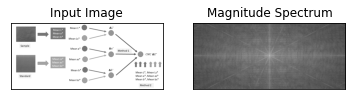

In [213]:
img = cv.imread('C:/Users/tusha/Desktop/Methodology.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

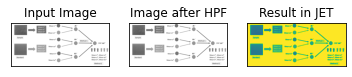

In [214]:
f_ishift = reverse_fft_shift(fshift)
img_back = idft_2d(f_ishift)

img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')

plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [485]:
def iffftt(fshift_):

    real_X, imag_X = np.real(fshift_), np.imag(fshift_)

    W_row, W_col = generate_twiddle_factor_matrix(fshift_.shape[0], fshift_.shape[1])

    real_W, imag_W = np.real(W_row), np.imag(W_row)
    
    Real_K, Imag_K = np.dot(real_W,real_X) - np.dot(imag_W,imag_X), np.dot(imag_W,real_X) + np.dot(real_W,imag_X)
    
    complex_result = np.vectorize(complex)(Real_K, Imag_K)
    
    
    real_X, imag_X = np.real(complex_result), np.imag(complex_result)
    
    real_W, imag_W = np.real(W_col), np.imag(W_col)
    
    Real_K, Imag_K = np.dot(real_X,real_W) - np.dot(imag_X,imag_W), np.dot(imag_X,real_W) + np.dot(real_X,imag_W)
    
    complex_result = np.vectorize(complex)(Real_K, Imag_K)
    
    return W_row, W_col, complex_result

In [538]:
def iffftt(fshift_):

    real_X, imag_X = np.real(fshift_), np.imag(fshift_)

    W_row, W_col = generate_twiddle_factor_matrix(fshift_.shape[0], fshift_.shape[1])
    
    Ir_real, Ir_img, Ic_real, Ic_img = DFTMatrix2Current(W_row, W_col)
    
    Real_K, Imag_K = np.dot(Ir_real,real_X) - np.dot(Ir_img,imag_X), np.dot(Ir_img,real_X) + np.dot(Ir_real,imag_X)
    
    complex_result = np.vectorize(complex)(Real_K, Imag_K)
    
    
    real_X, imag_X = np.real(complex_result), np.imag(complex_result)
    
    Real_K, Imag_K = np.dot(real_X,Ic_real) - np.dot(imag_X,Ic_img), np.dot(imag_X,Ic_real) + np.dot(real_X,Ic_img)
    
    complex_result = np.vectorize(complex)(Real_K, Imag_K)
    
    return W_row, W_col, complex_result

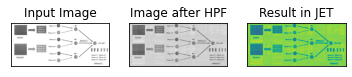

In [539]:
W_row,W_col,img_back = iffftt(f_ishift)

img_back = np.real(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')

plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [532]:
w = np.real(W_row)

def w2Current(w):
    
    hard_data=pd.read_excel('Paper_exp/DPE/GLSVLSI/Enc_Dec_v7/Mem_data/1T1R_SET_New_All.xlsx')

    r, i =hard_data["Read Res."].values, hard_data["Read Current "].values

    G_H, G_L, mu, W_H =1/(np.min(r)*1e3), 1/(np.max(r)*1e3), np.min(w), np.max(w)

    alpha=(G_H-G_L)/(W_H+abs(mu))

    G=alpha*(w+abs(mu))+G_L

    R = ((1e-3/G).astype('int')).astype('str')

    dict_RI_map={}

    for (key,value) in zip(r,i):

        dict_RI_map[str(key)]=value

    R_df=pd.DataFrame(R)
    
    return R_df.replace(dict_RI_map)

In [537]:
def DFTMatrix2Current(W_row, W_col):
    
    wrow_real, wrow_imag = np.real(W_row), np.imag(W_row)
    
    Ir_real, Ir_img = w2Current(wrow_real), w2Current(wrow_imag)
    
    wcow_real, wcow_imag = np.real(W_col), np.imag(W_col)
    
    Ic_real, Ic_img = w2Current(wcow_real), w2Current(wcow_imag)
    
    return Ir_real, Ir_img, Ic_real, Ic_img

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from src.allf import *

class Mem_LT:
    
    def __init__(self,file, V_column, R_column, I_column, P_column):
        
        self.mem_data = [file, V_column, R_column, I_column, P_column]
        
        self.R_list = []
        
        self.clip_V = 0.75
        
        self.clip = False
        
    def curve_fitting(self, func, V, I): 
    
        popt, pcov = curve_fit(func, V, I)

        a,b=popt

        return a,b

    def func(self, x, a, b):

        return a*x + b
        
    def read_data(self):
        
        mem = pd.read_csv(self.mem_data[0],header=None)

        self.mem_ = mem.rename(columns={mem.columns[0]:self.mem_data[1],mem.columns[1]:self.mem_data[2],mem.columns[2]:self.mem_data[3],mem.columns[3]:self.mem_data[4]})
        
        self.mem_.iloc[:,2]=self.mem_.iloc[:,2]*-1
        
    def clip_data(self):
        
        self.read_data()
        
        self.clip = True

        self.mem_ = self.mem_[np.abs(self.mem_[self.mem_data[1]])<=self.clip_V]
        
    def model_creation(self, clip_=False, R_list=[]):
        
        Model =[];
        
        self.R_list = R_list
        
        if not clip_:
            
            self.read_data()
            
        else:
            
            self.clip_data()

        for r in self.R_list:

            RI=self.mem_[self.mem_[self.mem_data[2]]==r]

            a, b = self.curve_fitting(self.func,RI[self.mem_data[1]].values,RI[self.mem_data[3]].values)

            c, d = self.curve_fitting(self.func,RI[self.mem_data[1]].values,RI[self.mem_data[4]].values)

            Model.append((r,a,b,c,d))

        self.model = np.array(Model)